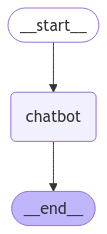

Assistant: 《黑神话:悟空》的第一关关卡名为“山海关”。在这一关中，玩家将体验到游戏的基本机制和战斗系统，同时也会见到游戏中的一些敌人和环境设定。通过这一关，玩家可以初步了解游戏的故事背景和角色设定。
Goodbye!


In [2]:
import os

# 开启 LangSmith 跟踪，便于调试和查看详细执行信息
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "chatbot"

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# 定义状态类型，继承自 TypedDict，并使用 add_messages 函数将消息追加到现有列表
class State(TypedDict):
    messages: Annotated[list, add_messages]

# 创建一个状态图对象，传入状态定义
graph_builder = StateGraph(State)

from langchain_openai import ChatOpenAI
import os
api_key = os.getenv("OPENAI_API_KEY")
api_base = 'https://api.yesapikey.com/v1'  # 替换为你的 API 端点
# 初始化 ChatOpenAI 模型，指定使用的模型为 'gpt-4o-mini'
chat_model = ChatOpenAI(openai_api_key=api_key,
    openai_api_base=api_base, model="gpt-4o-mini")

# 定义聊天机器人的节点函数，接收当前状态并返回更新的消息列表
def chatbot(state: State):
    return {"messages": [chat_model.invoke(state["messages"])]}

# 第一个参数是唯一的节点名称，第二个参数是每次节点被调用时的函数或对象
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
# 编译状态图并生成可执行图对象
graph = graph_builder.compile()

# 你可以使用 get_graph 方法来可视化图，并结合 draw 方法（如 draw_ascii 或 draw_png）
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

# 开始一个简单的聊天循环
while True:
    # 获取用户输入
    user_input = input("User: ")

    # 可以随时通过输入 "quit"、"exit" 或 "q" 退出聊天循环
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")  # 打印告别信息
        break  # 结束循环，退出聊天

    # 将每次用户输入的内容传递给 graph.stream，用于聊天机器人状态处理
    # "messages": ("user", user_input) 表示传递的消息是用户输入的内容
    for event in graph.stream({"messages": ("user", user_input)}):

        # 遍历每个事件的值
        for value in event.values():
            # 打印输出 chatbot 生成的最新消息
            print("Assistant:", value["messages"][-1].content)

In [3]:
from langchain_community.tools.tavily_search.tool import TavilySearchResults
# 定义 Tavily 搜索工具，最大搜索结果数设置为 2
tool = TavilySearchResults( max_results=2)
tools = [tool]
# 测试工具调用
tool.invoke({'query':"《黑神话:悟空》的第一关关卡是什么?"})

[{'url': 'https://www.gamersky.com/handbook/202408/1803231.shtml',
  'content': '第1页：第一回-苍狼林 前山. 展开. 《黑神话悟空》的关卡设计相当复杂，地图中藏着各种隐藏令人惊叹，稍不注意就会错过很多，这里我来为大家制作《黑神话悟空》全探索图文攻略，对地图中隐藏的NPC支线任务、隐藏关卡、隐藏BOSS、重要收集等等内容结合'},
 {'url': 'https://www.bilibili.com/video/BV1ktWreuEbm/',
  'content': '黑神话悟空剧情攻略. 15.9万播放. 简介：路盲路痴的福音，因为我是所以懂!. 第一关所有隐藏和支线全做完；已有112名黑神话悟空玩家向您推荐本视频，点击前往哔哩哔哩bilibili一起观看；更多实用攻略教学，爆笑沙雕集锦，你所不知道的游戏知识，热门游戏'}]

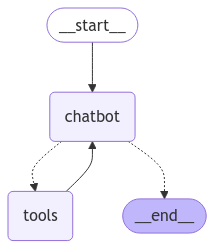

Assistant: 
Assistant: [{"url": "https://gl.ali213.net/html/2024-8/1481121.html", "content": "\u9ed1\u795e\u8bdd\u609f\u7a7a\u7b2c\u4e00\u7ae0\u9690\u85cf\u5173\u5361\u600e\u4e48\u8fdb\uff1f\u5176\u5b9e\u7b2c\u4e00\u7ae0\u4e2d\u6709\u4e24\u4e2a\u9690\u85cf\u5173\uff0c\u7b2c\u4e8c\u4e2a\u9700\u8981\u8fdb\u5165\u7b2c\u4e8c\u7ae0\u540e\u83b7\u53d6\u9053\u5177\u518d\u56de\u6765\u6253\uff0c\u76f8\u4fe1\u5f88\u591a\u5c0f\u4f19\u4f34\u4e0d\u77e5\u9053\u9ed1\u795e\u8bdd\u609f\u7a7a\u7b2c\u4e00\u7ae0\u9690\u85cf\u5173\u5361\u600e\u4e48\u8fdb\uff0c\u5c0f\u7f16\u4e5f\u662f\u4e3a\u73a9\u5bb6\u4eec\u5e26\u6765\u4e86\u6709\u5173\u4e8e\u9ed1\u795e\u8bdd\u609f\u7a7a\u7b2c\u4e00\u7ae0\u9690\u85cf\u5173\u5361\u89e3\u9501\u653b\u7565\uff0c\u611f\u5174\u8da3\u7684\u5c0f\u4f19\u4f34\u53ef\u4ee5\u4e0e\u5c0f\u7f16\u5728\u4e0b\u9762\u4e00\u8d77\u6765\u770b\u4e00\u770b\u54e6\u3002"}, {"url": "https://www.gamersky.com/handbook/202408/1803231.shtml", "content": "\u7b2c1\u9875\uff1a\u7b2c\u4e00\u56de-\u82cd\u72fc

In [4]:

from typing import Annotated
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
import os
api_key = os.getenv("OPENAI_API_KEY")
api_base = 'https://api.yesapikey.com/v1'  # 替换为你的 API 端点

# 定义状态
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


# 初始化 ChatOpenAI 模型，指定使用的模型为 'gpt-4o-mini'
chat_model = ChatOpenAI(openai_api_key=api_key,
    openai_api_base=api_base, model="gpt-4o-mini")

llm_with_tools = chat_model.bind_tools(tools)

# 更新聊天机器人节点函数，支持工具调用
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# 将更新后的节点添加到状态图中
graph_builder.add_node("chatbot", chatbot)

import json
from langchain_core.messages import ToolMessage

# 定义 BasicToolNode，用于执行工具请求
class BasicToolNode:
    """一个在最后一条 AIMessage 中执行工具请求的节点。

    该节点会检查最后一条 AI 消息中的工具调用请求，并依次执行这些工具调用。
    """

    def __init__(self, tools: list) -> None:
        # tools 是一个包含所有可用工具的列表，我们将其转化为字典，
        # 通过工具名称（tool.name）来访问具体的工具
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        """执行工具调用

        参数:
        inputs: 包含 "messages" 键的字典，"messages" 是对话消息的列表，
                其中最后一条消息可能包含工具调用的请求。

        返回:
        包含工具调用结果的消息列表
        """
        # 获取消息列表中的最后一条消息，判断是否包含工具调用请求
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("输入中未找到消息")

        # 用于保存工具调用的结果
        outputs = []

        # 遍历工具调用请求，执行工具并将结果返回
        for tool_call in message.tool_calls:
            # 根据工具名称找到相应的工具，并调用工具的 invoke 方法执行工具
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            # 将工具调用结果作为 ToolMessage 保存下来
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),  # 工具调用的结果以 JSON 格式保存
                    name=tool_call["name"],  # 工具的名称
                    tool_call_id=tool_call["id"],  # 工具调用的唯一标识符
                )
            )
        # 返回包含工具调用结果的消息
        return {"messages": outputs}
# 将 BasicToolNode 添加到状态图中
tool_node = BasicToolNode(tools=[tool])
print(tool_node)
graph_builder.add_node("tools", tool_node)
from typing import Literal

# 定义路由函数，检查工具调用
def route_tools(
    state: State,
) -> Literal["tools", "__end__"]:
    """
    使用条件边来检查最后一条消息中是否有工具调用。

    参数:
    state: 状态字典或消息列表，用于存储当前对话的状态和消息。

    返回:
    如果最后一条消息包含工具调用，返回 "tools" 节点，表示需要执行工具调用；
    否则返回 "__end__"，表示直接结束流程。
    """
    # 检查状态是否是列表类型（即消息列表），取最后一条 AI 消息
    if isinstance(state, list):
        ai_message = state[-1]
    # 否则从状态字典中获取 "messages" 键，取最后一条消息
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    # 如果没有找到消息，则抛出异常
    else:
        raise ValueError(f"输入状态中未找到消息: {state}")

    # 检查最后一条消息是否有工具调用请求
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"  # 如果有工具调用请求，返回 "tools" 节点
    return "__end__"  # 否则返回 "__end__"，流程结束

# 添加条件边，判断是否需要调用工具
graph_builder.add_conditional_edges(
    "chatbot",  # 从聊天机器人节点开始
    route_tools,  # 路由函数，决定下一个节点
    {
        "tools": "tools",
        "__end__": "__end__"
    },  # 定义条件的输出，工具调用走 "tools"，否则走 "__end__"
)

# 当工具调用完成后，返回到聊天机器人节点以继续对话
graph_builder.add_edge("tools", "chatbot")

# 指定从 START 节点开始，进入聊天机器人节点
graph_builder.add_edge(START, "chatbot")
# 编译状态图，生成可执行的流程图
graph = graph_builder.compile()

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


from langchain_core.messages import BaseMessage

# 进入一个无限循环，用于模拟持续的对话
while True:
    # 获取用户输入
    user_input = input("User: ")

    # 如果用户输入 "quit"、"exit" 或 "q"，则退出循环，结束对话
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")  # 打印告别语
        break  # 退出循环

    # 使用 graph.stream 处理用户输入，并生成机器人的回复
    # "messages" 列表中包含用户的输入，传递给对话系统
    for event in graph.stream({"messages": [("user", user_input)]}):

        # 遍历 event 的所有值，检查是否是 BaseMessage 类型的消息
        for value in event.values():
            if isinstance(value["messages"][-1], BaseMessage):
                # 如果消息是 BaseMessage 类型，则打印机器人的回复
                print("Assistant:", value["messages"][-1].content)